# Notebook 5: Exploring stations based on wealth

## Revising old Code

In [2]:
import pandas as pd

In [3]:
hunter1 = pd.read_csv("datasets/hunter/MTA_Subway_Origin-Destination_2021_Hunter_Origin.csv")
hunter2 = pd.read_csv("datasets/hunter/MTA_Subway_Origin-Destination_2022_Hunter_Origin.csv")
hunter3 = pd.read_csv("datasets/hunter/MTA_Subway_Origin-Destination_2023_Hunter_Origin.csv")
hunter4 = pd.read_csv("datasets/hunter/MTA_Subway_Origin-Destination_2024_Hunter_Origin.csv")
hunter_total = pd.concat([hunter1, hunter2, hunter3, hunter4])

In [4]:
ccny1 = pd.read_csv("datasets/ccny/MTA_Subway_Origin-Destination_2021_CCNY_Origin.csv")
ccny2 = pd.read_csv("datasets/ccny/MTA_Subway_Origin-Destination_2022_CCNY_Origin.csv")
ccny3 = pd.read_csv("datasets/ccny/MTA_Subway_Origin-Destination_2023_CCNY_Origin.csv")
ccny4 = pd.read_csv("datasets/ccny/MTA_Subway_Origin-Destination_2024_CCNY_Origin.csv")
ccny_total = pd.concat([ccny1, ccny2, ccny3, ccny4])

In [5]:
medgar1 = pd.read_csv("datasets/medgar/MTA_Subway_Origin-Destination_2021_Medgar_Origin.csv")
medgar2 = pd.read_csv("datasets/medgar/MTA_Subway_Origin-Destination_2022_Medgar_Origin.csv")
medgar3 = pd.read_csv("datasets/medgar/MTA_Subway_Origin-Destination_2023_Medgar_Origin.csv")
medgar4 = pd.read_csv("datasets/medgar/MTA_Subway_Origin-Destination_2024_Medgar_Origin.csv")
medgar_total = pd.concat([medgar1, medgar2, medgar3, medgar4])

In [ ]:
columbia1 = pd.read_csv("datasets/columbia/MTA_Subway_Origin-Destination_2021_Columbia_Origin.csv")
columbia2 = pd.read_csv("datasets/columbia/MTA_Subway_Origin-Destination_2022_Columbia_Origin.csv")
columbia3 = pd.read_csv("datasets/columbia/MTA_Subway_Origin-Destination_2023_Columbia_Origin.csv")
columbia4 = pd.read_csv("datasets/columbia/MTA_Subway_Origin-Destination_2024_Columbia_Origin.csv")
columbia_total = pd.concat([columbia1, columbia2, columbia3, columbia4])


In [7]:
nyu1 = pd.read_csv("datasets/nyu/MTA_Subway_Origin-Destination_2021_NYU_Origin.csv")
nyu2 = pd.read_csv("datasets/nyu/MTA_Subway_Origin-Destination_2022_NYU_Origin.csv")
nyu3 = pd.read_csv("datasets/nyu/MTA_Subway_Origin-Destination_2023_NYU_Origin.csv")
nyu4 = pd.read_csv("datasets/nyu/MTA_Subway_Origin-Destination_2024_NYU_Origin.csv")
nyu_total = pd.concat([nyu1, nyu2, nyu3, nyu4])


### Revising the top stations function with proper aggreagation

In [8]:
hunter4.groupby("Destination Station Complex Name")["Estimated Average Ridership"].sum().sort_values(ascending=False).head(10)

Destination Station Complex Name
Grand Central-42 St (S,4,5,6,7)                     117718.4568
86 St (4,5,6)                                        30781.2488
Lexington Av-53 St (E,M)/51 St (6)                   30359.9718
14 St-Union Sq (L,N,Q,R,W,4,5,6)                     29211.7772
Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)     26048.0097
23 St (6)                                            23284.7302
Fulton St (A,C,J,Z,2,3,4,5)                          22536.1408
33 St (6)                                            21584.3288
125 St (4,5,6)                                       21394.5491
Flushing-Main St (7)                                 20587.9163
Name: Estimated Average Ridership, dtype: float64

In [9]:
# Function to get the top station origins
def top_station_destinations(ridership_df, top_n=5):
    top_destinations = ridership_df.groupby("Destination Station Complex Name")["Estimated Average Ridership"].sum().sort_values(ascending=False).head(top_n)
    return top_destinations

In [10]:
top_station_destinations(hunter_total, 10)

Destination Station Complex Name
Grand Central-42 St (S,4,5,6,7)                     316178.8279
86 St (4,5,6)                                        94327.7467
14 St-Union Sq (L,N,Q,R,W,4,5,6)                     92800.2083
Lexington Av-53 St (E,M)/51 St (6)                   85145.9988
Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)     80553.0216
23 St (6)                                            73044.1285
Flushing-Main St (7)                                 70558.3883
Parkchester (6)                                      69257.7682
33 St (6)                                            67043.1571
Fulton St (A,C,J,Z,2,3,4,5)                          66720.8196
Name: Estimated Average Ridership, dtype: float64

## Explore specific times
* Use the ridership functions that were created
* Filter by certain times to better capture student ridership
* Examine the results

In [11]:
from utils import average_ridership_info

stations_of_interest = [135, 196, 209]

hunter_time_filtered = hunter_total[(hunter_total["Hour of Day"] >= 8) & (hunter_total["Hour of Day"] <= 17)]

hunter_time_filtered["Hour of Day"].unique()

array([13, 14, 15, 16, 17,  8,  9, 10, 11, 12])

In [12]:
# average_ridership_info(135, hunter_time_filtered, "hunter_135_8_to_17.txt")

In [13]:
ccny_time_filtered = ccny_total[(ccny_total["Hour of Day"] >= 8) & (ccny_total["Hour of Day"] <= 17)]
# average_ridership_info(135, ccny_time_filtered, "ccny_135_8_to_17.txt")

medgar_time_filtered = medgar_total[(medgar_total["Hour of Day"] >= 8) & (medgar_total["Hour of Day"] <= 17)]
# average_ridership_info(135, medgar_time_filtered, "medgar_135_8_to_17.txt")

columbia_time_filtered = columbia_total[(columbia_total["Hour of Day"] >= 8) & (columbia_total["Hour of Day"] <= 17)]
# average_ridership_info(135, columbia_time_filtered, "columbia_135_8_to_17.txt")

nyu_time_filtered = nyu_total[(nyu_total["Hour of Day"] >= 8) & (nyu_total["Hour of Day"] <= 17)]
# average_ridership_info(135, nyu_time_filtered, "nyu_135_8_to_17.txt")

In [14]:
# average_ridership_info(196, ccny_time_filtered, "ccny_196_8_to_17.txt")
# average_ridership_info(196, hunter_time_filtered, "hunter_196_8_to_17.txt")
# average_ridership_info(196, medgar_time_filtered, "medgar_196_8_to_17.txt")
# average_ridership_info(196, columbia_time_filtered, "columbia_196_8_to_17.txt")
# average_ridership_info(196, nyu_time_filtered, "nyu_196_8_to_17.txt")

# average_ridership_info(209, ccny_time_filtered, "ccny_209_8_to_17.txt")
# average_ridership_info(209, hunter_time_filtered, "hunter_209_8_to_17.txt")
# average_ridership_info(209, medgar_time_filtered, "medgar_209_8_to_17.txt")
# average_ridership_info(209, columbia_time_filtered, "columbia_209_8_to_17.txt")
# average_ridership_info(209, nyu_time_filtered, "nyu_209_8_to_17.txt")

## Clean neighborhood income dataset (no longer using)

In [15]:
# neighborhood_income = pd.read_csv("datasets/nyc_neighborhood_income.csv")

In [16]:
# neighborhood_income.head()

In [17]:
# df = neighborhood_income[["Neighborhood", "Household Income"]]

In [18]:
# df.head()

In [19]:
# df["split"] = df["Neighborhood"].str.split("(")

In [20]:
# df["Neighborhood Code"] = df["split"].str[1]

In [21]:
# df["Neighborhood Code"] = "(" + df["Neighborhood Code"]

In [22]:
# df["Household Income"] = df["Household Income"].str.strip()
# df["Household Income"] = df["Household Income"].str.replace("$", "")
# df["Household Income"] = df["Household Income"].str.replace(",", "")

In [23]:
# df["Household Income"] = df["Household Income"].astype(int)

In [24]:
# df["Neighborhood"] = df["split"].str[0]

In [25]:
# df = df[["Neighborhood", "Neighborhood Code", "Household Income"]]

In [26]:
# df.to_csv("nyc_neighborhood_income_clean.csv", index=False)

## Visualizing income by zipcode in NYC

* Geojson File for NYC Zipcodes came from [this Kaggle dataset](https://www.kaggle.com/datasets/saidakbarp/nyc-zipcode-geodata/data)

* Income by Zipcode Dataset came from [simplemaps](https://simplemaps.com/city/new-york/zips/income-household-median), where they aggregated the data from the U.S. Census Bureau and IRS.

* MTA Stations Dataset come from NYC Open Data

In [27]:
# import folium
# import geopandas as gpd
# import pandas as pd
# import json

# # Load NYC GeoJSON (Ensure it contains ZIP codes)
# geojson_file = "datasets/nyc_zipcode_geodata/nyc-zip-code-tabulation-areas-polygons.geojson"
# gdf = gpd.read_file(geojson_file)

# # Load ZIP Code Latitude/Longitude Data
# zip_coords = pd.read_csv("datasets/nyc_zipcode_geodata/uszipcodes_geodata.csv")

# # Convert ZIP codes to strings for proper merging
# gdf["postalCode"] = gdf["postalCode"].astype(str)
# zip_coords["ZIP"] = zip_coords["ZIP"].astype(str)

# # Merge GeoDataFrame with ZIP code coordinates
# gdf = gdf.merge(zip_coords, left_on="postalCode", right_on="ZIP", how="left")

# # Convert merged GeoDataFrame to JSON
# geojson_data = json.loads(gdf.to_json())

# # Create a folium map centered on NYC
# m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# # Add GeoJSON layer with tooltip for ZIP codes
# folium.GeoJson(
#     geojson_data,
#     name="NYC Neighborhoods",
#     style_function=lambda x: {
#         "fillColor": "lightblue",
#         "color": "black",
#         "weight": 1,
#         "fillOpacity": 0.6,
#     },
#     tooltip=folium.GeoJsonTooltip(fields=["postalCode"], aliases=["ZIP Code"]),
# ).add_to(m)


# Show the map
# m


In [28]:
# import folium
# import geopandas as gpd
# import pandas as pd
# import json

# # Load NYC GeoJSON (Ensure it contains ZIP codes)
# geojson_file = "datasets/nyc_zipcode_geodata/nyc-zip-code-tabulation-areas-polygons.geojson"
# gdf = gpd.read_file(geojson_file)

# # Load ZIP Code Latitude/Longitude Data
# zip_coords = pd.read_csv("datasets/nyc_zipcode_geodata/uszipcodes_geodata.csv")

# # Load Income Data
# income_data = pd.read_csv("datasets/nyc_median_income_zipcode.csv")

# # Convert ZIP codes to strings for proper merging
# gdf["postalCode"] = gdf["postalCode"].astype(str)
# zip_coords["ZIP"] = zip_coords["ZIP"].astype(str)
# income_data["zipcode"] = income_data["zipcode"].astype(str)

# # Merge GeoDataFrame with ZIP code coordinates and income data
# gdf = gdf.merge(zip_coords, left_on="postalCode", right_on="ZIP", how="left")
# gdf = gdf.merge(income_data, left_on="postalCode", right_on="zipcode", how="left")

# # Convert merged GeoDataFrame to JSON
# geojson_data = json.loads(gdf.to_json())

# # Define color scale based on income
# def get_income_color(income):
#     if pd.isna(income):
#         return "gray"
#     elif income < 50000:
#         return "red"
#     elif income < 100000:
#         return "orange"
#     elif income < 150000:
#         return "yellow"
#     elif income < 200000:
#         return "lightgreen"
#     else:
#         return "green"

# # Create a folium map centered on NYC
# m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# # Add GeoJSON layer with income-based coloring and tooltips
# folium.GeoJson(
#     geojson_data,
#     name="NYC Neighborhoods",
#     style_function=lambda x: {
#         "fillColor": get_income_color(x["properties"].get("income_household_median", None)),
#         "color": "black",
#         "weight": 1,
#         "fillOpacity": 0.6,
#     },
#     tooltip=folium.GeoJsonTooltip(
#         fields=["postalCode", "income_household_median"],
#         aliases=["ZIP Code", "Median Household Income"],
#         localize=True,
#     ),
# ).add_to(m)

# Show the map
# m


In [58]:
import folium
import geopandas as gpd
import pandas as pd
import json

# Load NYC GeoJSON (Ensure it contains ZIP codes)
geojson_file = "datasets/nyc_zipcode_geodata/nyc-zip-code-tabulation-areas-polygons.geojson"
gdf = gpd.read_file(geojson_file)

# Load ZIP Code Latitude/Longitude Data
zip_coords = pd.read_csv("datasets/nyc_zipcode_geodata/uszipcodes_geodata.csv")

# Load Income Data
income_data = pd.read_csv("datasets/nyc_median_income_zipcode.csv")

# Load MTA Subway Stations
mta_stations = pd.read_csv("datasets/MTA_Subway_Stations_and_Complexes_20250225.csv")

# Convert ZIP codes to strings for proper merging
gdf["postalCode"] = gdf["postalCode"].astype(str)
zip_coords["ZIP"] = zip_coords["ZIP"].astype(str)
income_data["zipcode"] = income_data["zipcode"].astype(str)

# Merge GeoDataFrame with ZIP code coordinates and income data
gdf = gdf.merge(zip_coords, left_on="postalCode", right_on="ZIP", how="left")
gdf = gdf.merge(income_data, left_on="postalCode", right_on="zipcode", how="left")

# Convert merged GeoDataFrame to JSON
geojson_data = json.loads(gdf.to_json())

# Define color scale based on income
def get_income_color(income):
    if pd.isna(income):
        return "gray"
    elif income < 50000:
        return "red"
    elif income < 100000:
        return "orange"
    elif income < 150000:
        return "yellow"
    elif income < 200000:
        return "lightgreen"
    else:
        return "green"

# Create a folium map centered on NYC
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add GeoJSON layer with income-based coloring and tooltips
folium.GeoJson(
    geojson_data,
    name="NYC Neighborhoods",
    style_function=lambda x: {
        "fillColor": get_income_color(x["properties"].get("income_household_median", None)),
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.6,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["postalCode", "income_household_median"],
        aliases=["ZIP Code", "Median Household Income"],
        localize=True,
    ),
).add_to(m)

# Add MTA Subway Stations as markers
for _, row in mta_stations.iterrows():
    if pd.notna(row["Latitude"]) and pd.notna(row["Longitude"]):
        folium.CircleMarker(
            location=[row["Latitude"], row["Longitude"]],
            radius=5,
            color="blue",
            fill=True,
            fill_color="blue",
            fill_opacity=0.7,
            popup=folium.Popup(
                f"Station: {row['Stop Name']}<br>Station ID: {row['Complex ID']}<br>Routes: {row['Daytime Routes']}",
                max_width=300,
            ),
            tooltip=row["Stop Name"],
        ).add_to(m)

# Show the map
m


Next step is to filter down the number of stations available:
* Maybe remove all stations that are common transfer points and are very busy

## Graph the results from the origin destination ridership analysis
* Plotting the results of these 3 stations of interest
* 8am to 5pm

In [30]:
from utils import average_ridership_df

# Livonia Av
df_135_hunter = average_ridership_df(135, hunter_time_filtered)
df_135_ccny = average_ridership_df(135, ccny_time_filtered)
df_135_medgar = average_ridership_df(135, medgar_time_filtered)
df_135_columbia = average_ridership_df(135, columbia_time_filtered)
df_135_nyu = average_ridership_df(135, nyu_time_filtered)

# Aqueduct Racetrack
df_196_hunter = average_ridership_df(196, hunter_time_filtered)
df_196_ccny = average_ridership_df(196, ccny_time_filtered)
df_196_medgar = average_ridership_df(196, medgar_time_filtered)
df_196_columbia = average_ridership_df(196, columbia_time_filtered)
df_196_nyu = average_ridership_df(196, nyu_time_filtered)

# Far Rockaway
df_209_hunter = average_ridership_df(209, hunter_time_filtered)
df_209_ccny = average_ridership_df(209, ccny_time_filtered)
df_209_medgar = average_ridership_df(209, medgar_time_filtered)
df_209_columbia = average_ridership_df(209, columbia_time_filtered)
df_209_nyu = average_ridership_df(209, nyu_time_filtered)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_yearly_ridership(df):
    """Plots the yearly ridership histogram."""
    df_filtered = df[df["DayOfWeek"] != "Total"]
    df_filtered["Ridership"] = pd.to_numeric(df_filtered["Ridership"])
    
    yearly_ridership = df_filtered.groupby("Year")["Ridership"].sum()

    plt.figure(figsize=(10, 5))
    plt.bar(yearly_ridership.index, yearly_ridership.values, color="blue", alpha=0.7)
    plt.xlabel("Year")
    plt.ylabel("Total Ridership")
    plt.title("Yearly Ridership")
    plt.xticks(yearly_ridership.index)
    plt.show()

def plot_monthly_ridership(df):
    """Plots the monthly ridership histogram."""
    df_filtered = df[df["DayOfWeek"] != "Total"]  # Remove "Total" rows
    df_filtered["Ridership"] = pd.to_numeric(df_filtered["Ridership"])
    
    monthly_ridership = df_filtered.groupby("Month")["Ridership"].sum()

    plt.figure(figsize=(10, 5))
    plt.bar(monthly_ridership.index, monthly_ridership.values, color="green", alpha=0.7)
    plt.xlabel("Month")
    plt.ylabel("Total Ridership")
    plt.title("Monthly Ridership")
    plt.xticks(range(1, 13))
    plt.show()

In [44]:
df_135_hunter[(df_135_hunter["DayOfWeek"] == "Total") & 
              (df_135_hunter["Month"] == "Total")]

,Year,Month,DayOfWeek,Ridership
96,2021,Total,Total,458.7740
193,2022,Total,Total,549.8464
290,2023,Total,Total,836.0424
387,2024,Total,Total,931.0536


In [57]:
import matplotlib.pyplot as plt

def compare_annual_ridership(year, df_hunter, df_ccny, df_medgar, df_columbia, df_nyu):
    """
    Plots the total annual ridership for a given year across five predefined datasets.
    
    Parameters:
    - year (int): The year to filter the data
    - df_hunter, df_ccny, df_medgar, df_columbia, df_nyu (DataFrames): Ridership data for each station
    """
    datasets = [df_hunter, df_ccny, df_medgar, df_columbia, df_nyu]
    station_names = ["Hunter College", "CCNY", "Medgar Evers", "Columbia", "NYU"]
    total_ridership = []

    for df in datasets:
        # Filter for the given year and the "Total" row
        df_filtered = df[(df["Year"] == year) & 
                         (df["Month"] == "Total") & 
                         (df["DayOfWeek"] == "Total")]
        
        if not df_filtered.empty:
            total_ridership.append(df_filtered["Ridership"].values[0])  # Extract ridership value
        else:
            total_ridership.append(0)  # Default to 0 if no data is found

    # Plot the bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(station_names, total_ridership, color=['blue', 'green', 'red', 'purple', 'orange'])
    
    # Formatting
    plt.xlabel("Station")
    plt.ylabel("Total Ridership")
    plt.title(f"Total Annual Ridership for {year}")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    
    plt.show()


LIVONIA AV DESTINATION

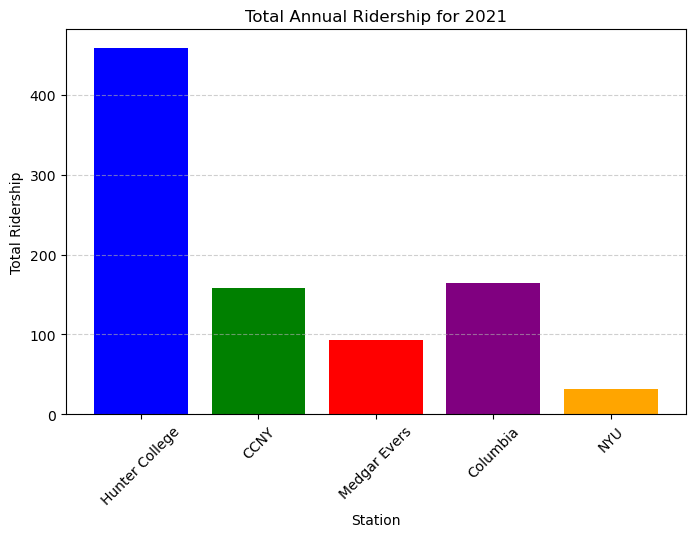

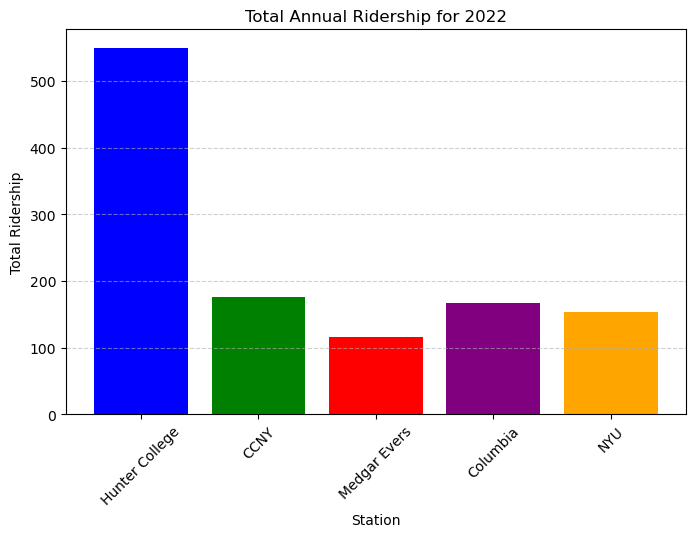

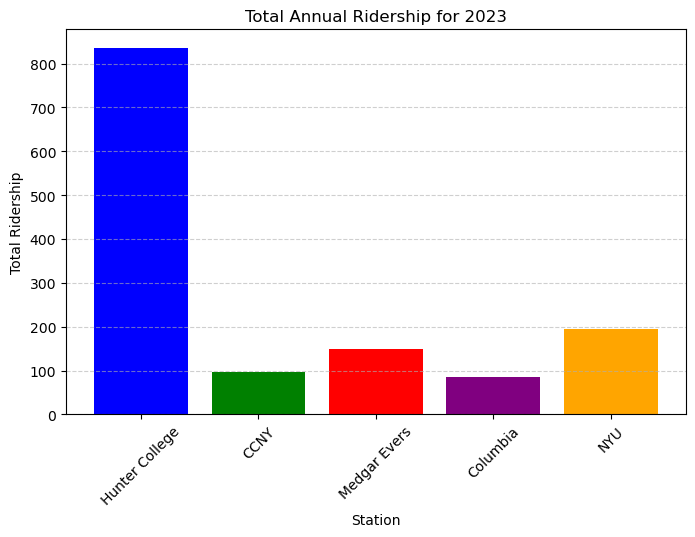

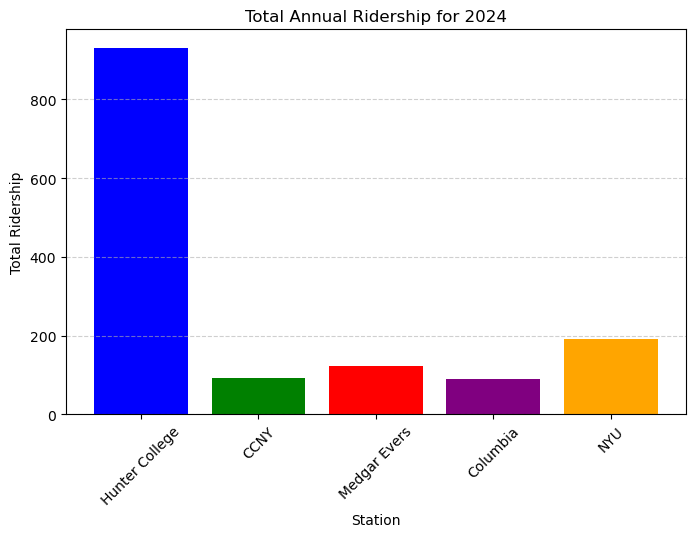

In [53]:
# Destination is Livonia Av
compare_annual_ridership(2021, df_135_hunter, df_135_ccny, df_135_medgar, df_135_columbia, df_135_nyu)
compare_annual_ridership(2022, df_135_hunter, df_135_ccny, df_135_medgar, df_135_columbia, df_135_nyu)
compare_annual_ridership(2023, df_135_hunter, df_135_ccny, df_135_medgar, df_135_columbia, df_135_nyu)
compare_annual_ridership(2024, df_135_hunter, df_135_ccny, df_135_medgar, df_135_columbia, df_135_nyu)

AQUEDUCT RACETRACK DESTINATION

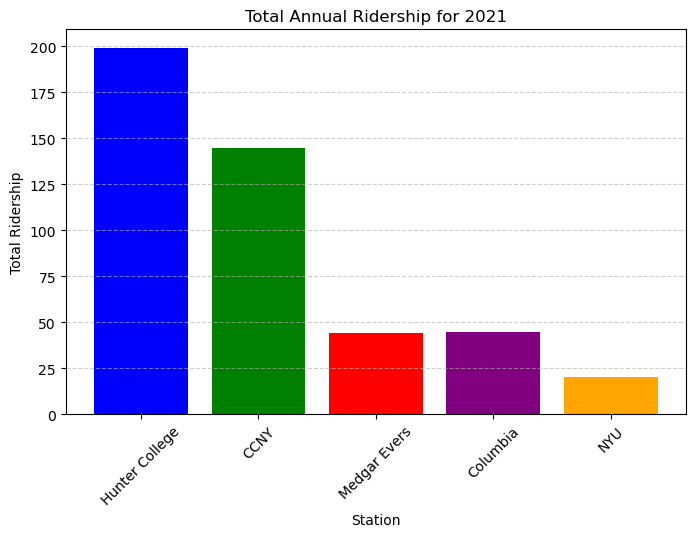

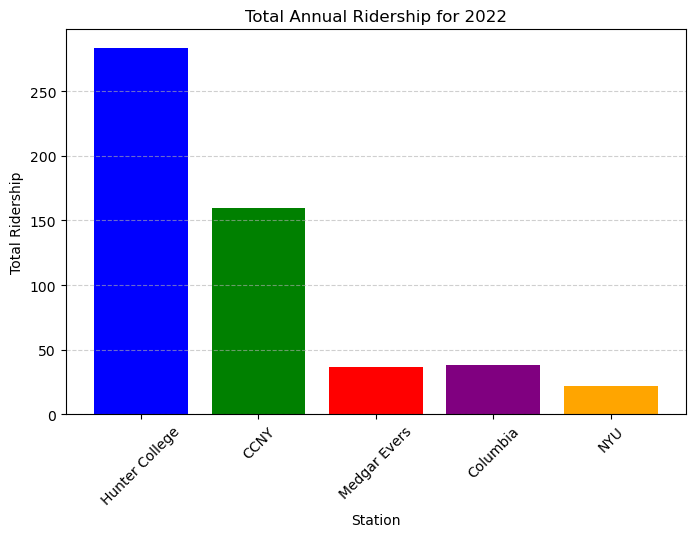

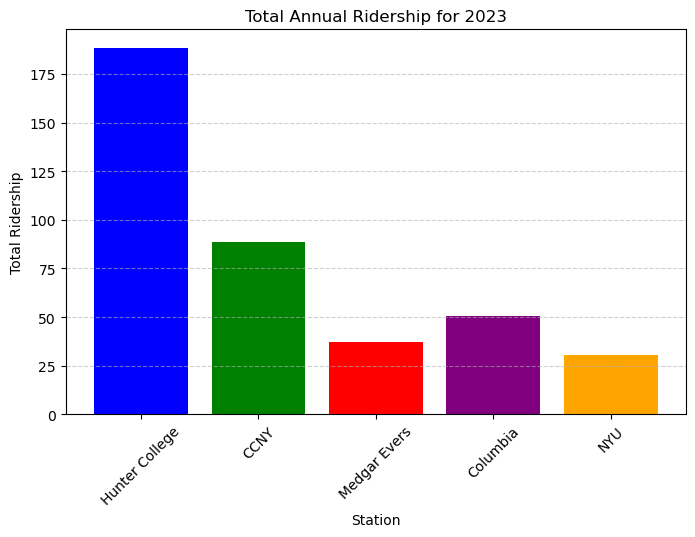

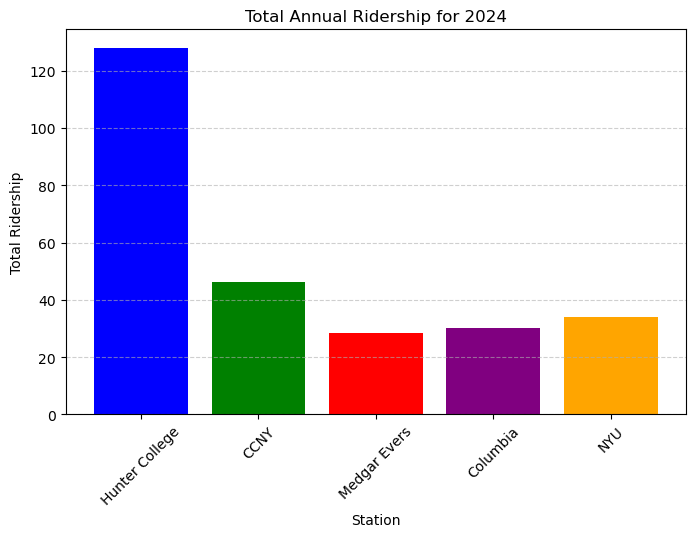

In [54]:
# Destination is Aqueduct Racetrack
compare_annual_ridership(2021, df_196_hunter, df_196_ccny, df_196_medgar, df_196_columbia, df_196_nyu)
compare_annual_ridership(2022, df_196_hunter, df_196_ccny, df_196_medgar, df_196_columbia, df_196_nyu)
compare_annual_ridership(2023, df_196_hunter, df_196_ccny, df_196_medgar, df_196_columbia, df_196_nyu)
compare_annual_ridership(2024, df_196_hunter, df_196_ccny, df_196_medgar, df_196_columbia, df_196_nyu)



FAR ROCKAWAY DESTINATION

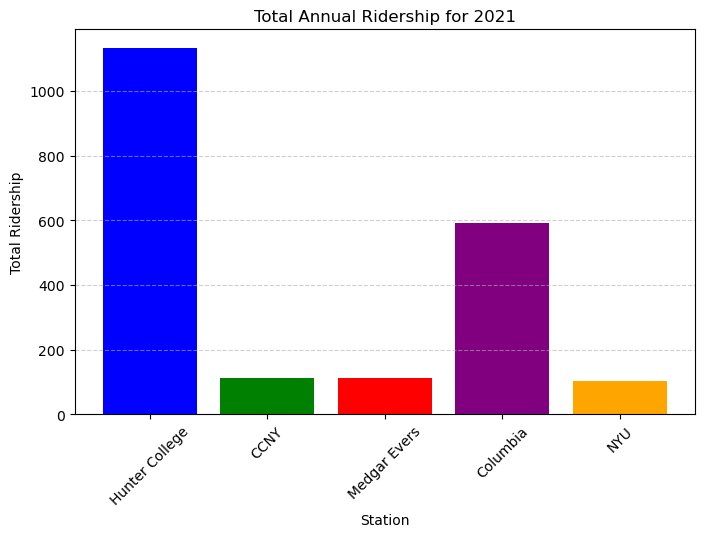

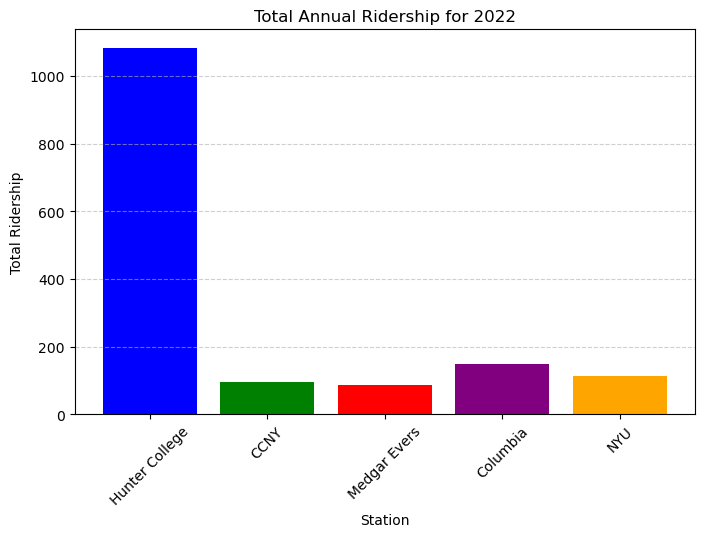

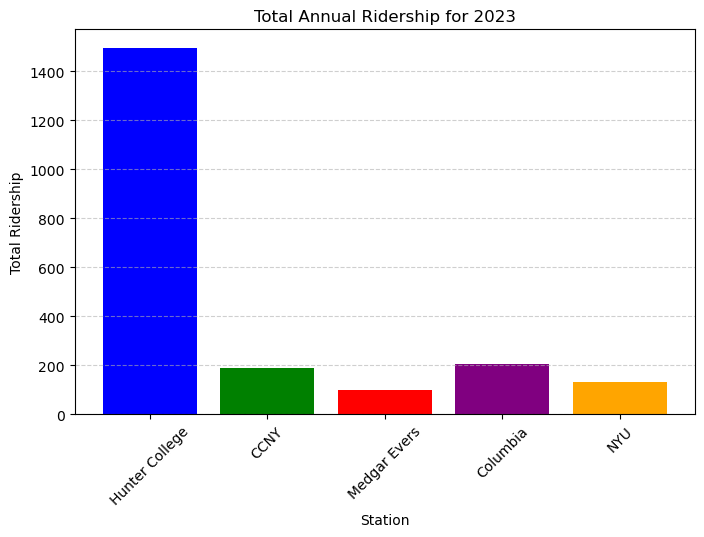

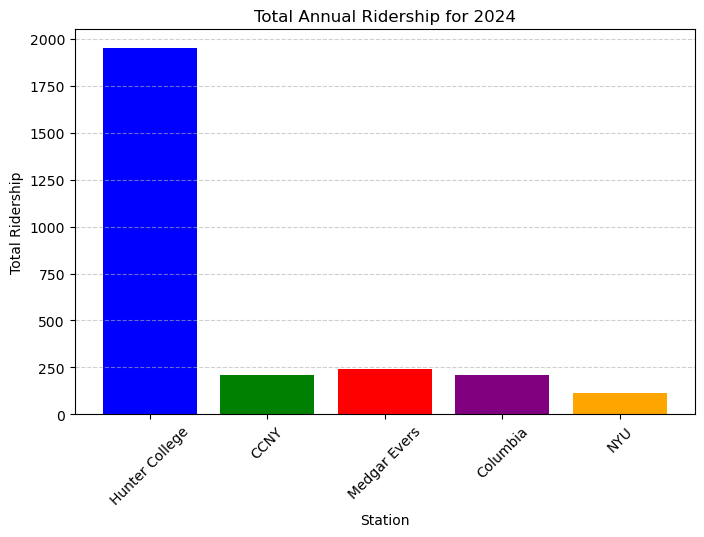

In [55]:
# Destination is Far Rockaway
compare_annual_ridership(2021, df_209_hunter, df_209_ccny, df_209_medgar, df_209_columbia, df_209_nyu)
compare_annual_ridership(2022, df_209_hunter, df_209_ccny, df_209_medgar, df_209_columbia, df_209_nyu)
compare_annual_ridership(2023, df_209_hunter, df_209_ccny, df_209_medgar, df_209_columbia, df_209_nyu)
compare_annual_ridership(2024, df_209_hunter, df_209_ccny, df_209_medgar, df_209_columbia, df_209_nyu)